<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset could be obtained at https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [1]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [2]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [5]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 95% 255M/269M [00:02<00:00, 140MB/s]
100% 269M/269M [00:02<00:00, 118MB/s]


In [10]:
!unzip gender-classification-dataset -d gender-classification-dataset


Streaming output truncated to the last 5000 lines.
  inflating: gender-classification-dataset/Validation/male/067031.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067038.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067040.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067046.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067048.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067054.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067064.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067068.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067069.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067086.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067091.jpg.jpg  
  inflating: gender-classification-dataset/Validation/male/067099.jpg.jpg  
  inflating: gender-classification-da

In [11]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the Gender Classification Dataset image folders (Lilly, Lotus, Orchid, Sunflower and Tulip)
female_folder = '/content/gender-classification-dataset/Validation/female'
male_folder = '/content/gender-classification-dataset/Validation/male'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Gender Classification Dataset images (Female)
for filename in os.listdir(female_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(female_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Female
# We Load and pre-process Gender Classification Dataset images (Male)
for filename in os.listdir(male_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(male_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Male
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [12]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])  # 2 classes: Female and Male

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
292/292 [==============================] - 225s 767ms/step - loss: 10.5481 - accuracy: 0.8036 - val_loss: 0.3020 - val_accuracy: 0.8867
Epoch 2/30
292/292 [==============================] - 204s 700ms/step - loss: 0.2567 - accuracy: 0.8990 - val_loss: 0.3501 - val_accuracy: 0.8524
Epoch 3/30
292/292 [==============================] - 212s 727ms/step - loss: 0.1713 - accuracy: 0.9322 - val_loss: 0.3751 - val_accuracy: 0.8845
Epoch 4/30
292/292 [==============================] - 211s 722ms/step - loss: 0.1315 - accuracy: 0.9488 - val_loss: 0.2786 - val_accuracy: 0.9107
Epoch 5/30
292/292 [==============================] - 208s 711ms/step - loss: 0.0988 - accuracy: 0.9630 - val_loss: 0.3350 - val_accuracy: 0.8923
Epoch 6/30
292/292 [==============================] - 219s 750ms/step - loss: 0.0556 - accuracy: 0.9799 - val_loss: 0.3411 - val_accuracy: 0.9103
Epoch 7/30
292/292 [==============================] - 215s 736ms/step - loss: 0.0522 - accuracy: 0.9809 - val_loss: 0.4024 

In [ ]:
# This section of code is to perform a cross validation on the model

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold

# Assuming you have loaded and pre-processed data (x_train, y_train)

# Number of folds for cross-validation
num_folds = 2

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(x_train, y_train)):
    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Definition of the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')  # 2 classes
    ])

    # Compilation of the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # Evaluate and store training and validation accuracy for this fold
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print the average training and validation accuracies across folds
print(f"\nAverage Training Accuracy: {sum(train_accuracies) / num_folds:.4f}")
print(f"Average Validation Accuracy: {sum(val_accuracies) / num_folds:.4f}")

In [16]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)
# Here we interpret the label using our dataset's class labels (0 Female and 1 Male)
class_labels = 'female'
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 46ms/step
Predicted class: e


In [17]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 44ms/step


In [24]:
# we test the model with a new photo from the internet.
# we know already that this new image is a Female image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/gender-classification-dataset/Validation/female/112968.jpg.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['Female', 'Male']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 200ms/step
Predicted class: Male


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

73/73 [==============================] - 19s 257ms/step


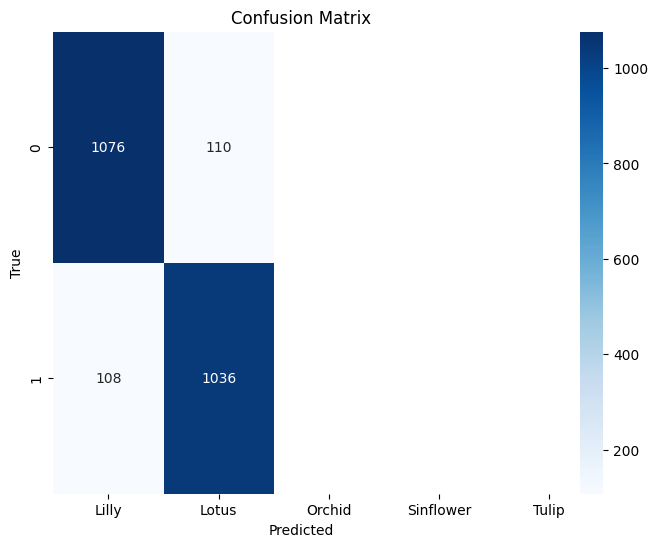

              precision    recall  f1-score   support

      Female       0.91      0.91      0.91      1186
        Male       0.90      0.91      0.90      1144

    accuracy                           0.91      2330
   macro avg       0.91      0.91      0.91      2330
weighted avg       0.91      0.91      0.91      2330



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lilly', 'Lotus', 'Orchid', 'Sinflower', 'Tulip'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['Female', 'Male'])
print(class_report)